In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [11]:
wage = pd.read_csv('data/wage.csv')
wage.rename(columns = {'Value': 'wage'}, inplace = True)
tax = pd.read_csv('data/tax.csv')
tax.rename(columns = {'Value': 'tax'}, inplace = True)
rawmat = pd.read_csv('data/rawmat.csv')
rawmat.rename(columns = {'Value': 'rawmat'}, inplace = True)
prod = pd.read_csv('data/prod.csv')
prod.rename(columns = {'Value': 'prod'}, inplace = True)
cpi = pd.read_csv('data/cpi.csv')
cpi.rename(columns = {'Value': 'cpi'}, inplace = True)

In [12]:
df = (pd.merge(wage, rawmat,
               on = 'Date', 
               how = 'outer'))
df = (pd.merge(df, cpi,
               on = 'Date', 
               how = 'outer')) 
df

,Date,wage,rawmat,cpi
0,2001-01,657.14,65.2,96.3
1,2001-02,653.59,65.8,96.8
2,2001-03,655.14,65.5,97.1
3,2001-04,652.44,65.2,97.8
4,2001-05,652.28,65.3,98.6
...,...,...,...,...
271,2023-08,1214.31,142.6,158.7
272,2023-09,1217.47,148.0,158.5
273,2023-10,1220.31,144.0,158.6
274,2023-11,1224.38,136.9,158.8


In [13]:
prod['Date'] = pd.to_datetime(prod['Date'].str[:4] + '-' +
                              prod['Date'].str[-2:].replace({'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}))

In [14]:
prod['Date'] = prod['Date'].dt.strftime('%Y-%m')

In [15]:
df = (pd.merge(df, prod, 
               on ='Date', 
               how ='outer'))

In [16]:
df['prod'] = df['prod'].ffill()

In [19]:
tax['Date'] = pd.to_datetime(tax['Date'], format = '%Y')

In [21]:
tax['Date'] = tax['Date'].dt.strftime('%Y-%m')

In [24]:
df = (pd.merge(df, tax,
               on = 'Date',
               how = 'outer'))



In [27]:
df['tax'] = df['tax'].ffill()
df.head(20)

,Date,wage,rawmat,cpi,prod,tax
0,2001-01,657.14,65.2,96.3,85.173,14.0
1,2001-02,653.59,65.8,96.8,85.173,14.0
2,2001-03,655.14,65.5,97.1,85.173,14.0
3,2001-04,652.44,65.2,97.8,86.150,14.0
4,2001-05,652.28,65.3,98.6,86.150,14.0
5,2001-06,656.81,63.9,98.7,86.150,14.0
6,2001-07,656.43,62.7,98.4,86.665,14.0
7,2001-08,659.47,62.7,98.4,86.665,14.0
8,2001-09,659.90,60.8,98.6,86.665,14.0
9,2001-10,660.91,57.7,98.1,87.697,14.0


In [44]:
scaler = StandardScaler()

df[df.columns.difference(['Date'])] = scaler.fit_transform(df[df.columns.difference(['Date'])])

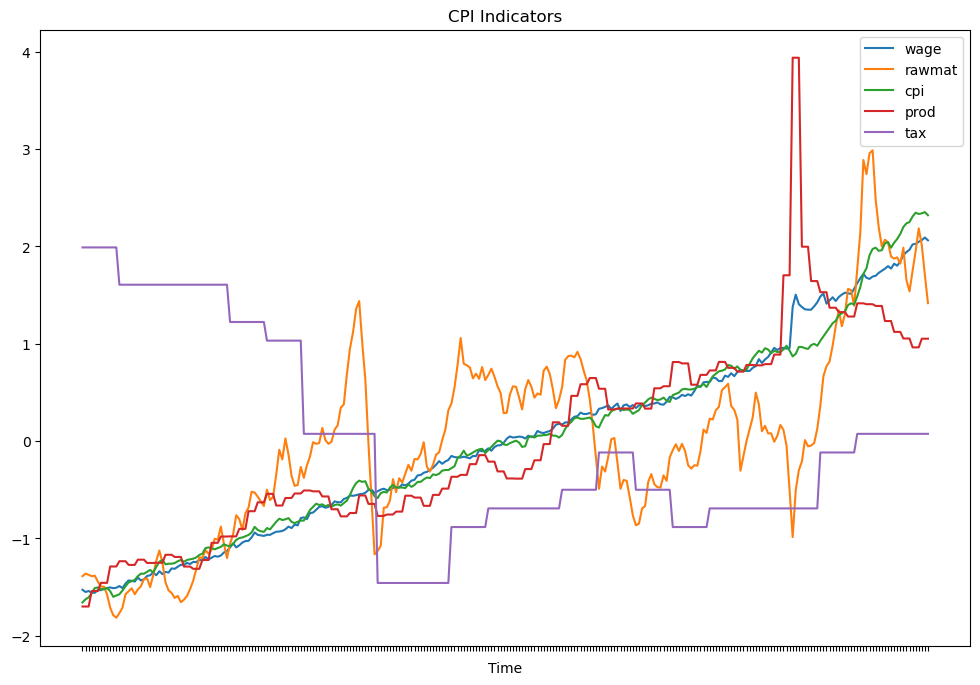

In [48]:
plt.figure(figsize = (12, 8))

for column in df.columns:
    if column != 'Date':
        (plt.plot(df['Date'], 
                 df[column], 
                 label = column))

plt.title('CPI Indicators')

plt.xlabel('Time')
plt.xticks(ticks=plt.gca().get_xticks(), labels=[])

plt.legend()



### Modelling: not just linear regression, but include some lag somehow...